In [1]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

from rllr.utils.plotting.video import show_video
from rllr.utils.logger import init_logger
from rllr.utils.common import switch_reproducibility_on
from rllr.utils.plotting.display import display_stats

In [3]:
from pyhocon import ConfigFactory

config = ConfigFactory.parse_file('../experiments/conf/minigrid_navigation_mlp_master_worker.hocon')
config['env']['video_path'] = './video/'

In [4]:
switch_reproducibility_on(config['seed'])

# Train worker

In [5]:
from experiments import train_worker
init_logger('experiments.train_worker')

In [6]:
env = train_worker.gen_navigation_env(config['env'])

In [7]:
worker_agent = train_worker.get_agent(config)

2021-06-02 21:46:27,307 INFO    rllr.algo.dqn          : Running on device: cpu


In [8]:
scores, steps = train_worker.run_episodes(env, worker_agent, n_episodes=1000, verbose=100)

2021-06-02 21:47:41,576 INFO    experiments.train_worker   : Episode: 100. scores: -12.21, steps: 130.36, achieved: 0.75
2021-06-02 21:48:39,782 INFO    experiments.train_worker   : Episode: 200. scores: -9.15, steps: 100.49, achieved: 0.82
2021-06-02 21:49:14,489 INFO    experiments.train_worker   : Episode: 300. scores: -4.43, steps: 54.79, achieved: 0.95
2021-06-02 21:49:34,687 INFO    experiments.train_worker   : Episode: 400. scores: -2.48, steps: 35.59, achieved: 0.98
2021-06-02 21:49:47,259 INFO    experiments.train_worker   : Episode: 500. scores: -0.96, steps: 20.53, achieved: 0.99
2021-06-02 21:50:01,498 INFO    experiments.train_worker   : Episode: 600. scores: -1.45, steps: 25.37, achieved: 0.99
2021-06-02 21:50:11,820 INFO    experiments.train_worker   : Episode: 700. scores: -0.72, steps: 18.16, achieved: 1.00
2021-06-02 21:50:23,694 INFO    experiments.train_worker   : Episode: 800. scores: -1.07, steps: 21.56, achieved: 0.99
2021-06-02 21:50:33,689 INFO    experiments.t

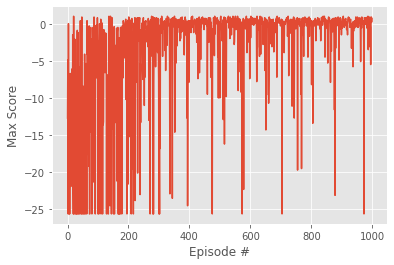

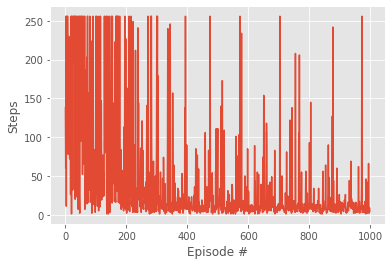

In [9]:
display_stats(scores, steps)

# Train master

In [10]:
from experiments import train_master
init_logger('experiments.train_master')

In [11]:
config = ConfigFactory.parse_file('../experiments/conf/minigrid_navigation_mlp_master_worker.hocon')
del config['env']['goal_achieving_criterion']
del config['env']['goal_type']

In [12]:
emb_size = worker_agent.qnetwork_local.state_encoder.goal_state_encoder.output_size
master_agent = train_master.get_master_agent(emb_size, config)
worker_agent.explore = False

In [13]:
env = train_worker.gen_env(config['env'])

In [14]:
scores, steps = train_master.run_episodes(env, worker_agent, master_agent, n_episodes=1000, verbose=100)

2021-06-02 21:51:52,905 INFO    experiments.train_master   : Episode: 100. scores: 0.81, steps: 51.38
2021-06-02 21:52:23,313 INFO    experiments.train_master   : Episode: 200. scores: 0.92, steps: 23.05
2021-06-02 21:54:43,397 INFO    experiments.train_master   : Episode: 300. scores: 0.61, steps: 106.38
2021-06-02 21:59:39,900 INFO    experiments.train_master   : Episode: 400. scores: 0.15, steps: 220.66
2021-06-02 22:03:52,124 INFO    experiments.train_master   : Episode: 500. scores: 0.29, steps: 187.04
2021-06-02 22:07:37,078 INFO    experiments.train_master   : Episode: 600. scores: 0.40, steps: 161.49
2021-06-02 22:12:49,863 INFO    experiments.train_master   : Episode: 700. scores: 0.15, steps: 219.49
2021-06-02 22:18:47,459 INFO    experiments.train_master   : Episode: 800. scores: 0.04, steps: 246.75
2021-06-02 22:25:09,527 INFO    experiments.train_master   : Episode: 900. scores: 0.00, steps: 256.00
2021-06-02 22:31:41,990 INFO    experiments.train_master   : Episode: 1000.

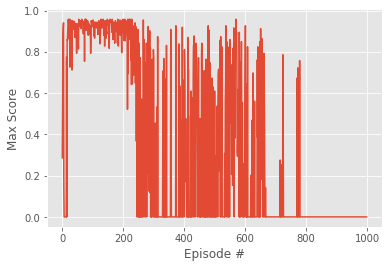

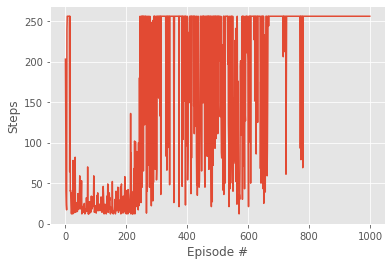

In [15]:
display_stats(scores, steps)